# kettler analysis

In [1]:
import os
import sys
import pandas as pd
from pathlib import Path
from textwrap import wrap
import plotly.express as px
import datetime as dt
import requests
exec(requests.get(
    'https://gist.githubusercontent.com/smeisegeier/4944b9a88b7a90cb1b2acc6da0dd906f/raw/'
    ).text)

# * get src directory which *must* be parent
dir_src = Path(os.getcwd()).parent.parent

# # * add to path
# if dir_src.as_posix() not in sys.path:
#     sys.path.append(dir_src.as_posix())

# * display / style settings
pd.options.display.max_rows = 100
pd.options.display.max_colwidth = 160
pd.options.display.precision = 2


# * theme settings
THEME = "dark" # 'light'

if THEME == 'dark':
    THEME_PLOTLY="plotly_dark"
else:
    THEME_PLOTLY="plotly"

In [2]:
df_training=pd.read_parquet('data/trainings.pq')
df_records=pd.read_parquet('data/records.pq')

## training

In [3]:
my_show_info(df_training)

,#,Column,Non-Null,Count,Dtype,Uni_Count,Nulls,Most_Frequent,skew,kurto,mean,min,25%,50%,75%,max,std
0,0,Id,1103,non-null,int64,1103,0,1 | 1,-0.002,-1.198,554.9,1.0,279.5,555.0,830.5,1106.0,318.71
1,1,Device,1103,non-null,object,1,0,SJ10X SKYLON 5 | 1103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Calibration,1103,non-null,object,1,0,07655-350-2007 | 1103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Software,1103,non-null,object,1,0,3367 | 1103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Date,1103,non-null,object,1100,0,17.04.2021 | 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Time,1103,non-null,object,1085,0,12:48:48 | 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,RecordIntervall,1103,non-null,object,1,0,10 | 1103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,Transmission,1103,non-null,object,1,0,9.5 | 1103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,Energy,1103,non-null,object,1,0,6.0 | 1103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,TrainingDateTime,1103,non-null,object,1102,0,2016-07-15T18:23:31+01:00 | 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#
# * id col is new index
if "Id" in df_training.columns:
    df_training.set_index("Id", inplace=True, drop=True)
if "Id" in df_records.columns:
    df_records.set_index("Id", inplace=True, drop=True)

# * convert to proper datetime (remove 'T')
df_training.TrainingDateTime=pd.to_datetime(df_training.TrainingDateTime, errors='coerce')

df_training['daytime']=df_training.TrainingDateTime.dt.hour.map(
    lambda x: "morning" if x < 13 else "day" if x < 18 else "evening"
)

# * add day_of_week
df_training['day_of_week']=df_training.TrainingDateTime.dt.strftime('%A')

# * join both tables on records level
df=df_records.join(df_training, on="TrainingId")
df

# * drop unneeded columns: filename, createdat, TrainingId
col_one_item = [col for col in df if len(df[col].unique()) == 1]
print(f"remove these one-item columns:{col_one_item}")

df.drop(
    # * subtract columns to make the statement idempotent
    columns=set(df.columns)
    & (set(["FileName", "CreatedAt", "TrainingId"]) | set(col_one_item)),
    inplace=True,
)

df[:3]

remove these one-item columns:['Device', 'Calibration', 'Software', 'RecordIntervall', 'Transmission', 'Energy']


,Pulse,Power,RPM,TimePassed_minutes,TimePassed_percent,Score_10sec,Date,Time,TrainingDateTime,Duration_minutes,Streak_days,daytime,day_of_week
Id,,,,,,,,,,,,,
1,0,50,46,0.17,3.13e-03,1.97e-03,11.01.2014,20:09:26,2014-01-11 20:09:26+01:00,53.17,0,evening,Saturday
2,0,150,45,36.17,6.80e-01,5.77e-03,11.01.2014,20:09:26,2014-01-11 20:09:26+01:00,53.17,0,evening,Saturday
3,0,150,49,36.00,6.77e-01,6.28e-03,11.01.2014,20:09:26,2014-01-11 20:09:26+01:00,53.17,0,evening,Saturday


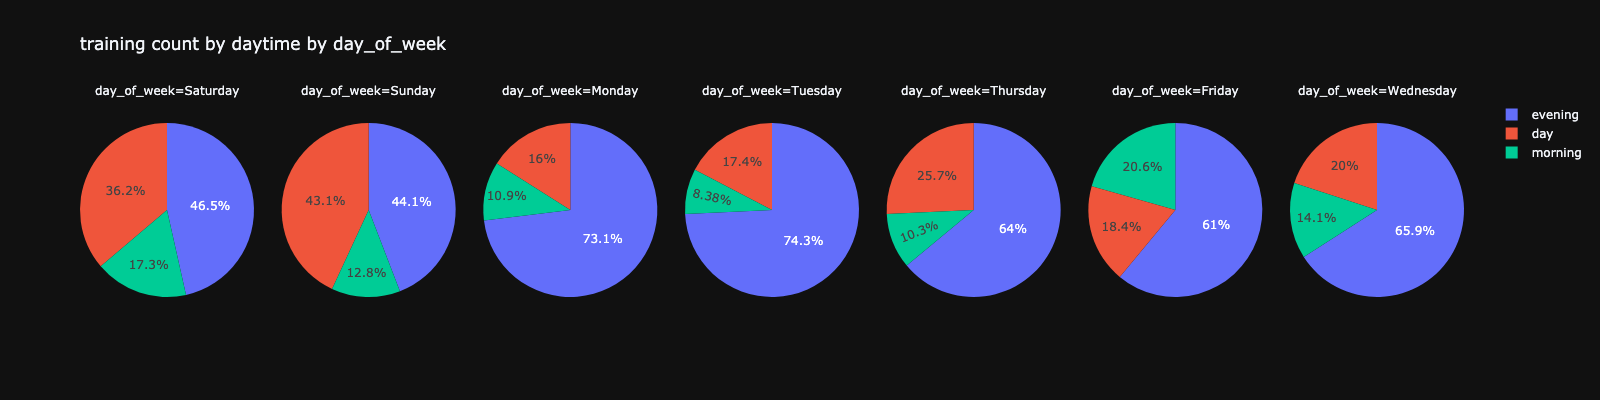

In [5]:
px.pie(
    df_training,
    names="daytime",
    template=THEME_PLOTLY,
    title="training count by daytime by day_of_week",
    facet_col="day_of_week",
    width=1600,
    height=400,
).show("png")

In [6]:
_df = df_training

_fig = px.box(
    _df,
    y=_df.Duration_minutes,
    template=THEME_PLOTLY,
    color='daytime',
    category_orders={'color': ["morning", "day", "evening"]},
    points="outliers",
    # points=False,
    facet_col=_df.TrainingDateTime.dt.year,
    # height=300,
    )
_fig.show()